# Generating Data - Lab

## Introduction

In this lab, we shall practice some of the data generation techniques that we saw in the previous lesson in order to generate datasets for regression and classification purposes. We will run a couple of simple simulations to help us generate different datasets by controlling noise and variance parameters in the data generation process. We will also look at the statistical indicators and visual output to see how these parameters affect the accuracy of an algorithm. 

## Objectives
In this lab you will:

- Generate datasets for classification problems
- Generate datasets for regression problems

## Generate data for classfication

Use `make_blobs()` to create a binary classification dataset with 100 samples, 2 features, and 2 centers (where each center corresponds to a different class label). Set `random_state = 42` for reproducibility.

_Hint: Here's a link to the documentation for_ [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [40]:
from sklearn.datasets import make_blobs
import pandas as pd

blobs = make_blobs(centers = 2)
blobs[0][0]

array([-7.57610339, -9.16196722])

Place the data in a `pandas` DataFrame called `df`, and inspect the first five rows of the data. 

_Hint: Your dataframe should have three columns in total, two for the features and one for the class label._ 

In [22]:
# Your code here 
df_temp1 = pd.DataFrame(blobs[0])
df_temp2 = pd.DataFrame(blobs[1], columns = ['category'])
df = pd.concat([df_temp1, df_temp2], axis = 1)
df.head()

,0,1,category
0,-0.630899,-5.116597,0
1,1.206759,-4.963380,0
2,3.089675,-7.690192,1
3,0.006656,-5.716014,0
4,-0.299872,-5.535925,0


Create a scatter plot of the data, while color-coding the different classes.

_Hint: You may find this dictionary mapping class labels to colors useful: 
`colors = {0: 'red', 1: 'blue'}`_

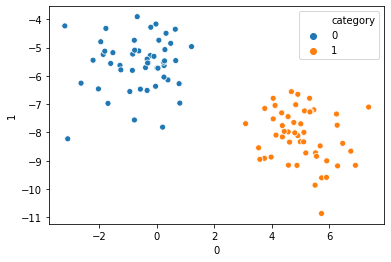

In [26]:
import seaborn as sns

sns.scatterplot(x = df[0], y = df[1], hue = 'category', data = df)

Repeat this exercise two times by setting `cluster_std = 0.5` and `cluster_std = 2`. 

Keep all other parameters passed to `make_blobs()` equal. 

That is:
* Create a classification dataset with 100 samples, 2 features, and 2 centers using `make_blobs()` 
    * Set `random_state = 42` for reproducibility, and pass the appropriate value for `cluster_std`  
* Place the data in a `pandas` DataFrame called `df`  
* Plot the values on a scatter plot, while color-coding the different classes 

What is the effect of changing `cluster_std` based on your plots? 

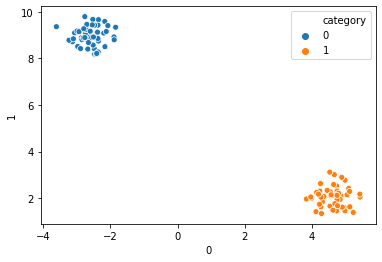

In [34]:
def plot_a_blob(cluster_std):
    blobs = make_blobs(centers = 2, cluster_std = cluster_std, random_state=42)
    df_temp1 = pd.DataFrame(blobs[0])
    df_temp2 = pd.DataFrame(blobs[1], columns = ['category'])
    df = pd.concat([df_temp1, df_temp2], axis = 1)
    return sns.scatterplot(x = df[0], y = df[1], hue = 'category', data = df);

plot_a_blob(.42);


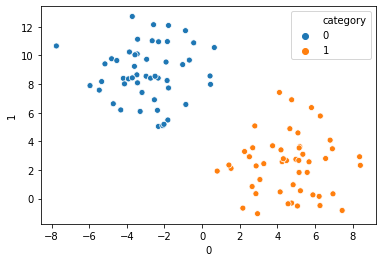

In [29]:
# Your code here: 
plot_a_blob(2);

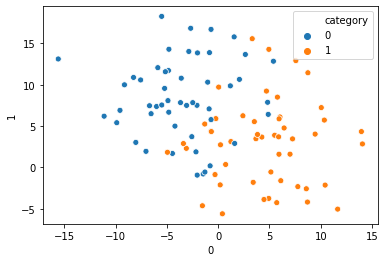

In [33]:
plot_a_blob(5);

## Generate data for regression

Create a function `reg_simulation()` to run a regression simulation creating a number of datasets with the `make_regression()` data generation function. Perform the following tasks:

* Create `reg_simulation()` with `n` (noise) and `random_state` as input parameters
    * Make a regression dataset (X, y) with 100 samples using a given noise value and random state
    * Plot the data as a scatter plot 
    * Calculate and plot a regression line on the plot and calculate $R^2$ (you can do this in `statsmodels` or `sklearn`)
    * Label the plot with the noise value and the calculated $R^2$ 
    
* Pass a fixed random state and values from `[10, 25, 40, 50, 100, 200]` as noise values iteratively to the function above 
* Inspect and comment on the output 

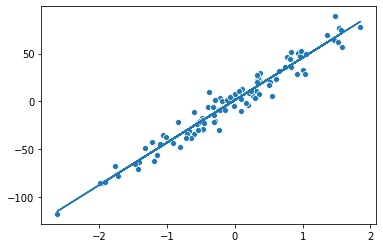

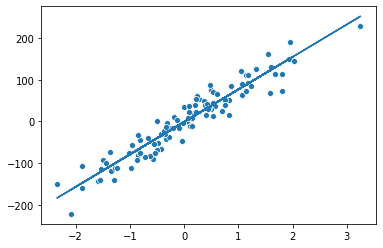

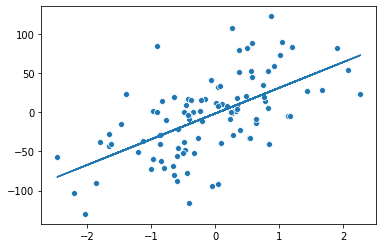

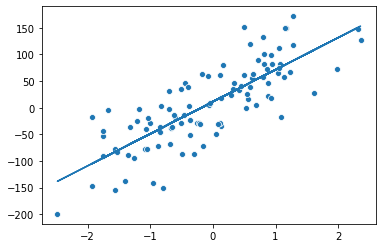

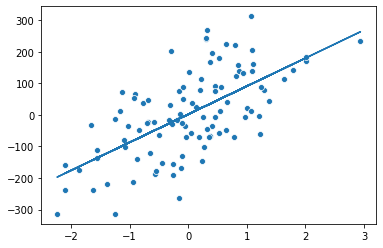

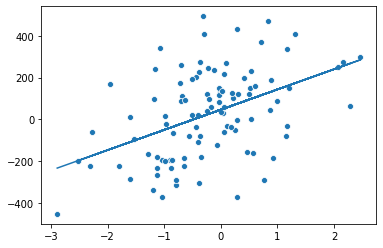

In [70]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np

def reg_simulation(n, random_state):
    plt.figure()
    # Generate X and y
    X, y = make_regression(n_samples=100, n_features=1, noise=n, random_state=random_state)
    sns.scatterplot(X[:,0], y);

    # Use X,y to draw a scatter plot
    # Fit a linear regression model to X , y and calculate r2
    linreg = LinearRegression()
    thing = linreg.fit(X, y)
    # label and plot the regression line 
    plt.plot(X[:,0], thing.predict(X))
random_state = random_state = np.random.RandomState(42)

for n in [10, 25, 40, 50, 100, 200]:
    reg_simulation(n, random_state)

In [ ]:
# Your comments here

## Summary 

In this lesson, we learned how to generate random datasets for classification and regression problems. We ran simulations for this and fitted simple models to view the effect of random data parameters including noise level and standard deviation on the performance of parameters, visually as well as objectively. These skills will come in handy while testing model performance and robustness in the future. 